In [23]:
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install seaborn

In [24]:
!tree ~/Projects/BitSize_ML/

/Users/nejat/Projects/BitSize_ML/
└── end_to_end_ml
    ├── data
    │   └── housing.csv
    ├── images
    │   └── ENV checking.png
    ├── models
    └── notebooks
        ├── 1_setup.ipynb
        ├── 2_fetch_data.ipynb
        ├── 3_overview_EDA.ipynb
        ├── 4_data_split.ipynb
        ├── 5_stratified_split.ipynb
        ├── 6_visualizing_geospatial_data.ipynb
        └── 7_correlation_pairs.ipynb

6 directories, 9 files


In [25]:
df_path = Path.cwd().parent /"data"/"housing.csv"
df = pd.read_csv(df_path)

In [26]:
def create_income_bins(df):
    df = df.copy()
    df['income_cat'] = pd.cut(df['median_income'],
                              bins=[0,1.5,3, 4.5,6,np.inf],
                              labels=[1,2,3,4,5])
    return df
df_binned = create_income_bins(df)

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_idx, test_idx in split.split(df_binned,df_binned['income_cat']):
    train_strat = df_binned.loc[train_idx].drop(columns=['income_cat'])
    test_strat = df_binned.loc[test_idx].drop(columns=['income_cat'])
print(f"[Stratified], train_size={len(train_strat)}, test_size={len(test_strat)}")

[Stratified], train_size=16512, test_size=4128


In [28]:
housing = train_strat.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 15114 to 4065
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [30]:
corr = housing.corr(numeric_only=True)
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924515,-0.107396,0.038920,0.063716,0.095062,0.049887,-0.018045,-0.045971
latitude,-0.924515,1.000000,0.011084,-0.030210,-0.061034,-0.104538,-0.065363,-0.076466,-0.143824
housing_median_age,-0.107396,0.011084,1.000000,-0.358209,-0.315985,-0.289334,-0.297971,-0.126726,0.104282
total_rooms,0.038920,-0.030210,-0.358209,1.000000,0.930166,0.856554,0.919508,0.199384,0.132752
total_bedrooms,0.063716,-0.061034,-0.315985,0.930166,1.000000,0.877503,0.980155,-0.008126,0.047036
population,0.095062,-0.104538,-0.289334,0.856554,0.877503,1.000000,0.907055,0.002534,-0.027283
households,0.049887,-0.065363,-0.297971,0.919508,0.980155,0.907055,1.000000,0.012779,0.062956
median_income,-0.018045,-0.076466,-0.126726,0.199384,-0.008126,0.002534,0.012779,1.000000,0.688361
median_house_value,-0.045971,-0.143824,0.104282,0.132752,0.047036,-0.027283,0.062956,0.688361,1.000000


In [31]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688361
total_rooms           0.132752
housing_median_age    0.104282
households            0.062956
total_bedrooms        0.047036
population           -0.027283
longitude            -0.045971
latitude             -0.143824
Name: median_house_value, dtype: float64

In [32]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [33]:
attr = ['median_house_value','median_income','total_rooms','housing_median_age','latitude']

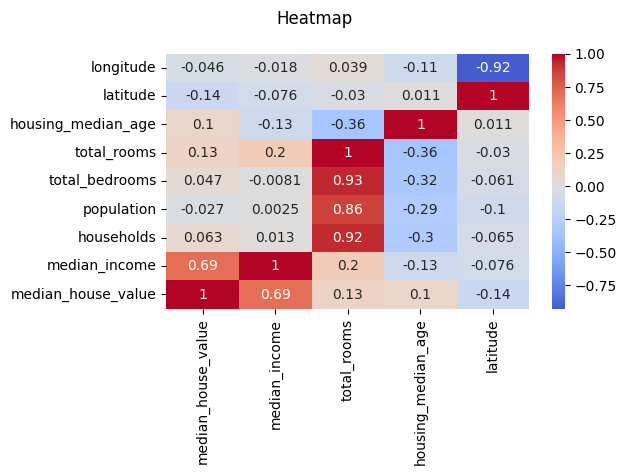

In [34]:
sns.heatmap(corr[attr], annot=True, cmap='coolwarm', center=0)
plt.suptitle("Heatmap")
plt.tight_layout()
plt.show()

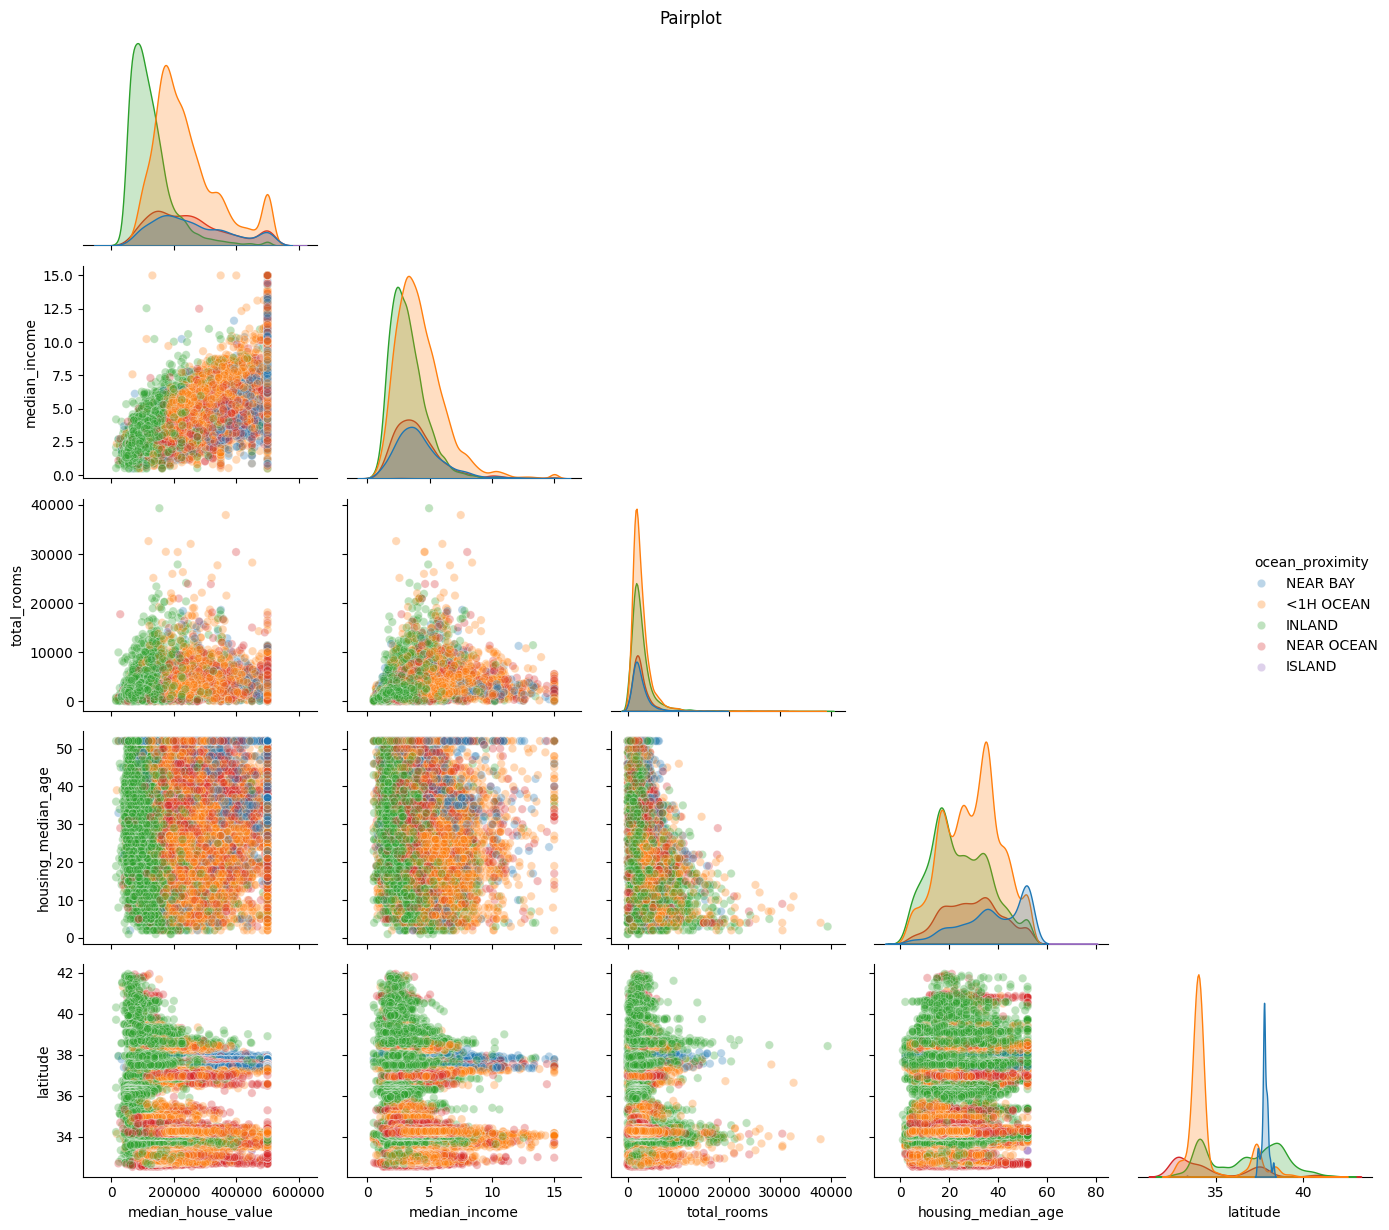

In [37]:
sns.pairplot(df[attr + ['ocean_proximity']],corner=True, hue='ocean_proximity',
             diag_kind='kde',
             plot_kws={"alpha":0.3})
plt.suptitle("Pairplot")
plt.tight_layout()
plt.show()